In [48]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
def generate_mixed_signals(signals):
    mixed_signal = np.zeros(len(signals[0]))
    for signal in signals:
        mixed_signal = mixed_signal+signal*np.random.random()
    return mixed_signal

## Blind source separation: An Example
While blind source separation might sound like a daunting word, it simply refer to the task of distinguishing signal from different sources through an observed mixture.  We do this all the time when we are at a party and multiple people are talking at the same time.  The signal from each sources, the speaches from each speakers, are mixed in the air as it travels to the two sensor array that we carry around call "ears".  Our brain then computes the signal and asign components of it to each of our friends

<img src="people-toasting-wine-glasses-3171837-min-1110x630.jpg" alt="drawing" width="500"/>


## Independent Component Analysis(ICA) 
One popular method for Blind Source Separation is the Independent Component Analysis(ICA)
In this example we explore how ICA can be used to separate a mixture of sine, square and saw waves from signal mixtures detected 3 three "sensors"

In [97]:
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)
sine = np.sin(2 * time) 
square = np.sign(np.sin(3 * time)) 
saw = signal.sawtooth(2 * np.pi * time)  
Signal = np.c_[sine, square, saw]
Signal += 0.2 * np.random.normal(size=Signal.shape)
print('generating the signal')

generating the signal


The signals and the mixtures are showns as below

Text(0.5, 1.0, 'source1: the Sine wave')

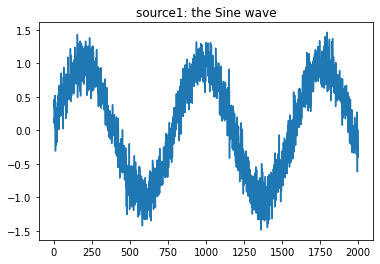

In [98]:
plt.plot(Signal[:,0])
plt.title('source1: the Sine wave')

Text(0.5, 1.0, 'source1: the Square wave')

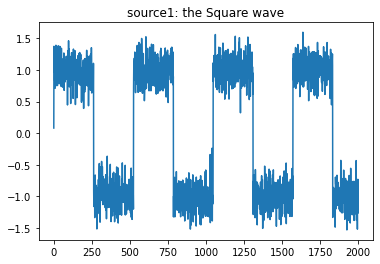

In [99]:
plt.plot(Signal[:,1])
plt.title('source1: the Square wave')

Text(0.5, 1.0, 'source1: the Saw wave')

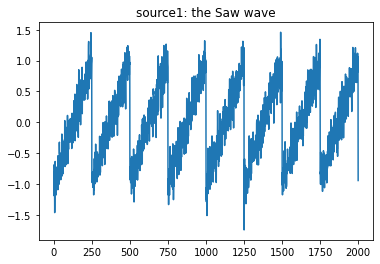

In [100]:
plt.plot(Signal[:,2])
plt.title('source1: the Saw wave')

In [102]:
Signal /= Signal.std(axis=0) 
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]]) 
X = np.dot(Signal, A.T) 

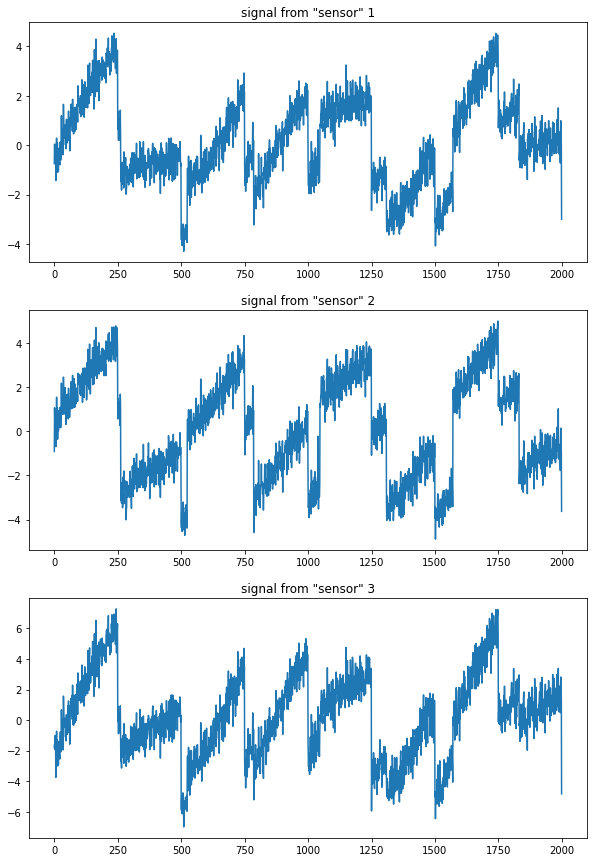

In [103]:
plt.figure(figsize=[10,15])
plt.subplot(3,1,1)
plt.title('signal from "sensor" 1')
plt.plot(X[:,0])
plt.subplot(3,1,2)
plt.title('signal from "sensor" 2')
plt.plot(X[:,1])
plt.subplot(3,1,3)
plt.title('signal from "sensor" 3')
plt.plot(X[:,2])

In [94]:
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X) 
print('performing ICA')

performing ICA


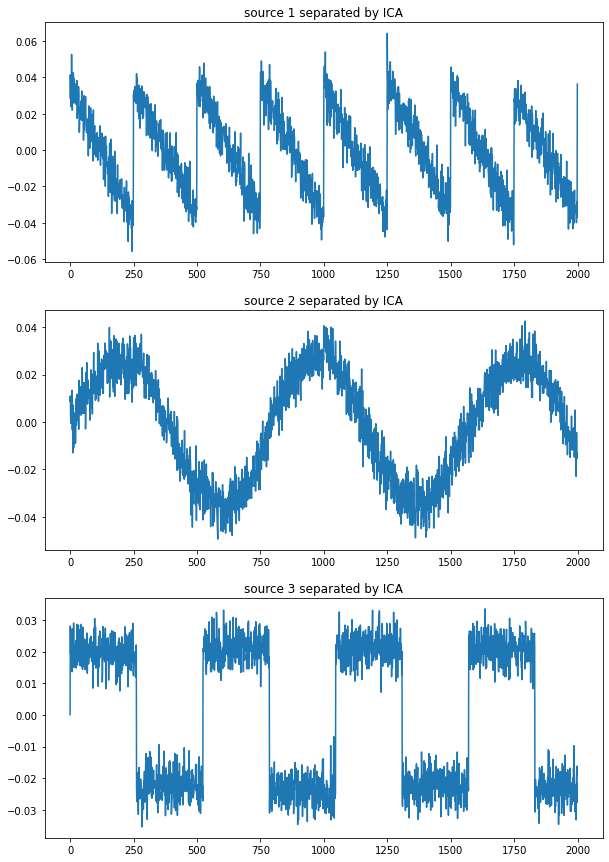

In [104]:
plt.figure(figsize=[10,15])
plt.subplot(3,1,1)
plt.title('source 1 separated by ICA')
plt.plot(S_[:,0])
plt.subplot(3,1,2)
plt.title('source 2 separated by ICA')
plt.plot(S_[:,1])
plt.subplot(3,1,3)
plt.title('source 3 separated by ICA')
plt.plot(S_[:,2])

### As we can see, in this case ICA successfully separated the signal from three sources from the mixture of signals

## Why Does ICA work?
To be continued..